In [70]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,9])                   # 指定图片大小
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
sns.set_style('darkgrid')                    # darkgrid,whitegrid,dark,white,ticks

In [71]:
np.random.seed(sum(map(ord, "categorical")))

In [72]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [73]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
sns.stripplot?

Signature: sns.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

Docstring:
Draw a scatterplot where one variable is categorical.

# 1 分类散点图

一种在分类变量的级别上显示某个定量变量值的简单方法`stripplot()`，它将散点图概括为其中一个变量是分类的情况

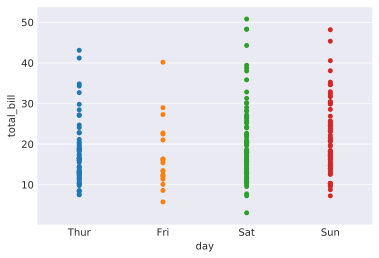

In [77]:
sns.stripplot(x="day",y="total_bill",data=tips)

在条状图中，散点图通常会重叠。

这使得很难看到数据的完整分布。

一个简单的解决方案是使用一些随机“抖动”调整位置（仅沿分类轴）

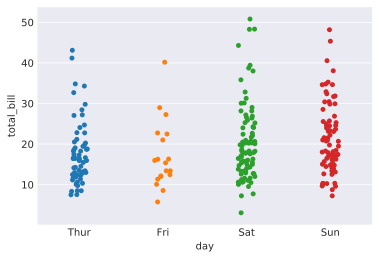

In [78]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

一种不同的方法是使用该函数swarmplot()，该函数使用避免重叠点的算法将分类轴上的每个散点图点放置在分类轴上

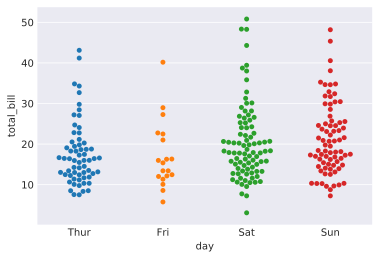

In [79]:
sns.swarmplot(x="day", y="total_bill", data=tips)

### 也可以使用hue参数添加嵌套分类变量。在分类轴上的颜色和位置上方是多余的，但现在每个都提供有关两个变量之一的信息

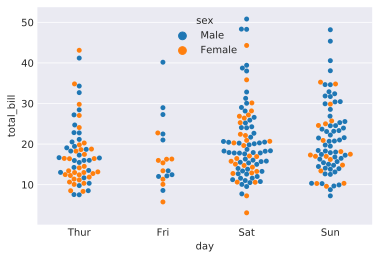

In [80]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

一般来说，seaborn分类绘图函数试图从数据中推断出类别的顺序。

如果您的数据有Pandas Categorical数据类型，那么可以在此设置类别的默认顺序。

对于其他数据类型，字符串类型的类别将按照它们在DataFrame中出现的顺序进行绘制，但看起来数字的类别将被排序

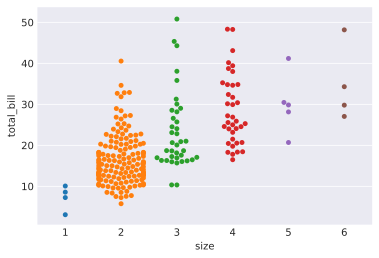

In [81]:
sns.swarmplot(x="size", y="total_bill", data=tips)

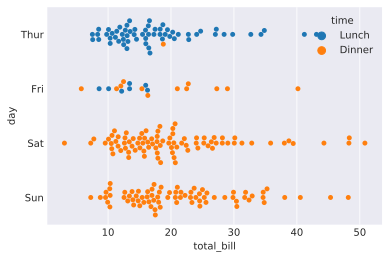

In [82]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)

# 2 类别内观察的分布

在某个点上，**分类散点图方法**在其可提供的关于**每个类别内的值分布的信息方面变得有限**

有几种方法可以通过各种方式对这些信息进行总结，以便于在**整个类别级别进行轻松比较**

这些将我们在本章中讨论的一些方法概括为我们想要**快速比较多个分布的情况**

### 2.1 sns.boxplot盒形图 

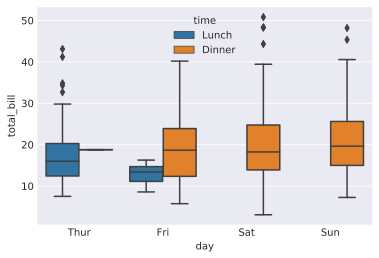

In [83]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

对于boxplots，使用hue变量时的假设是它嵌套在x或y变量中。

这意味着默认情况下，不同级别的框hue将被偏移，如上所示。

如果你的hue变量没有嵌套，你可以设置dodge参数来禁止偏移

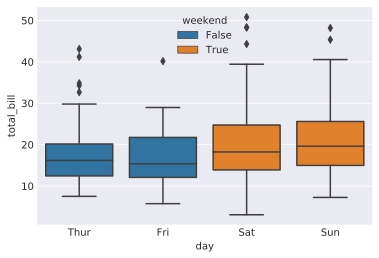

In [84]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False)

### 2.2 Violinplot小提琴图

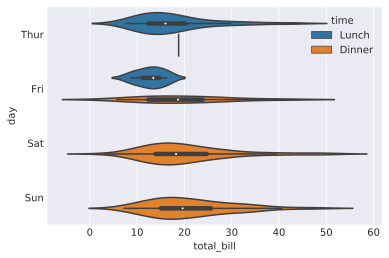

In [85]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)

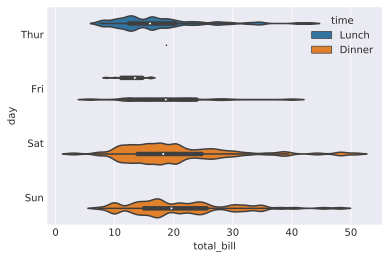

In [86]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,bw=.1, scale="count", scale_hue=False)

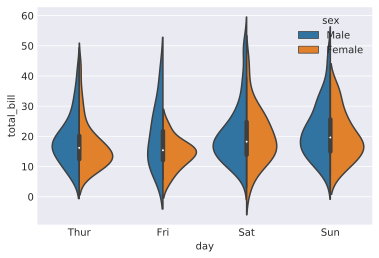

In [87]:
# 当色相参数只有两个等级时，也可以“拆分”小提琴，这样可以更有效地利用空间
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

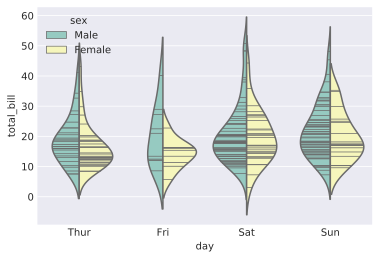

In [88]:
# 小提琴内部绘制的情节有几种选择，包括显示每个单独观察的方式而不是汇总箱线图值
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,split=True, inner="stick", palette="Set3")

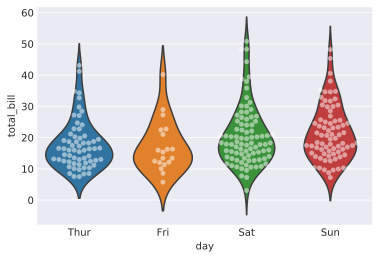

In [89]:
# 结合swarmplot()与violinplot()或boxplot()
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

### 2.3 Barplots条形图

**显示值的集中趋势可以用条形图**

一个熟悉的情节风格，实现这一目标是一个条形图。

在seaborn中，barplot()函数在完整数据集上运行，并显示任意估计值，默认情况下使用均值。

当每个类别中有多个观察值时，它还使用自引导来**计算估计值周围的置信区间，并绘制使用误差线的图**

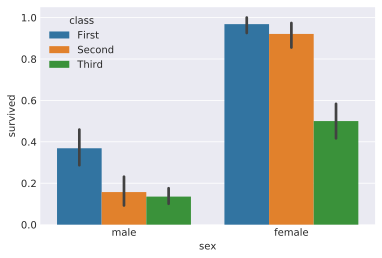

In [90]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

条形图的一个特例是当你想显示每个类别的观察数量而不是计算第二个变量的统计量时。

这与直方图类似于分类变量而不是定量变量。在seaborn中，使用该countplot()功能很容易

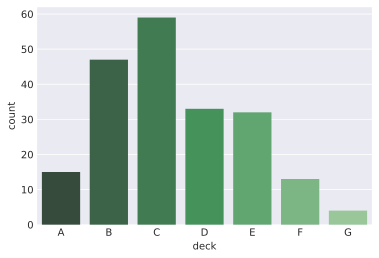

In [91]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

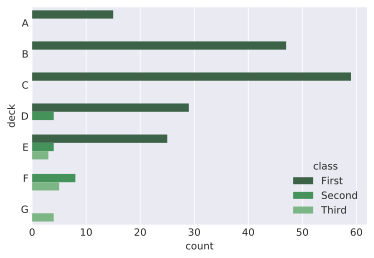

In [92]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

### 2.4 sns.pointplot点图

**更好的描述变化差异**

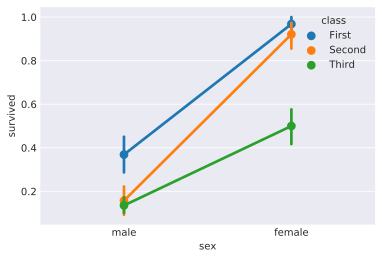

In [93]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

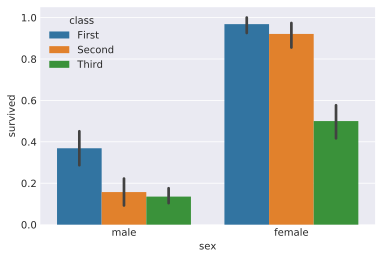

In [94]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

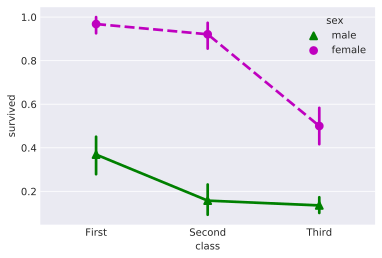

In [95]:
# 用不同的颜色/标记和线条样式来hue分类
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

### 2.5 绘制“宽幅”数据

虽然使用“长整型”或“整齐”数据是首选，但这些功能也可应用于各种格式的“宽型”数据，包括pandas DataFrames或二维numpy阵列。

这些对象应该直接传递给data参数

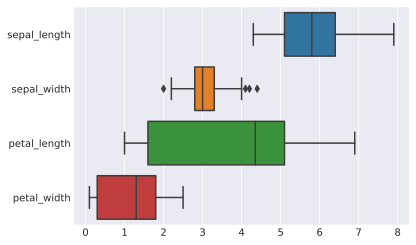

In [96]:
# 水平放置
sns.boxplot(data=iris, orient="h")

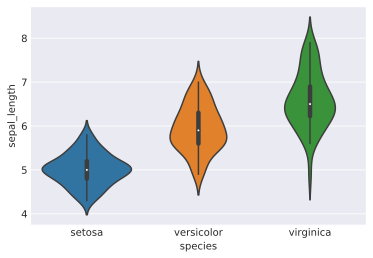

In [97]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

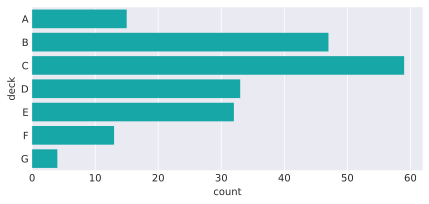

In [98]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

# 3 绘制多面板分类图（重要重要重要！！！应用最多）

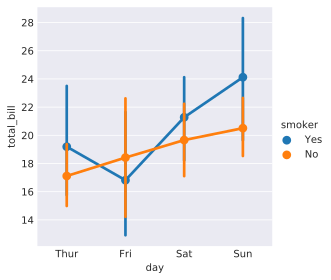

In [99]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

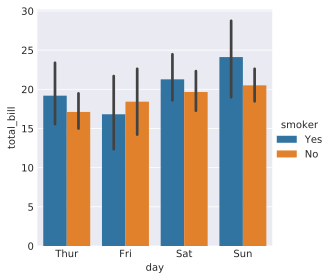

In [100]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

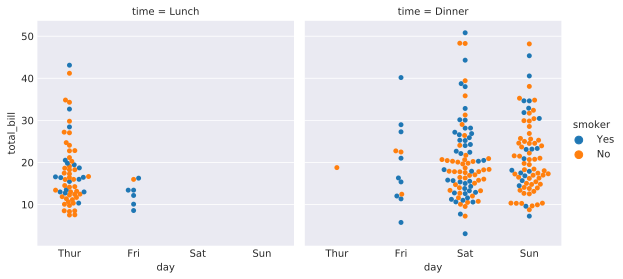

In [101]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

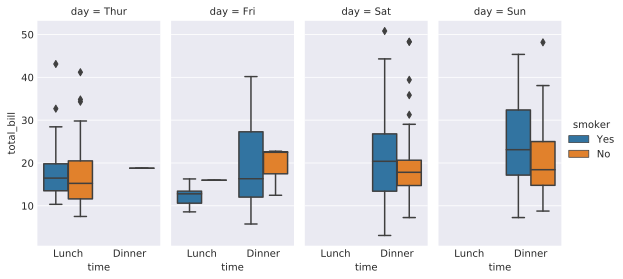

In [102]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

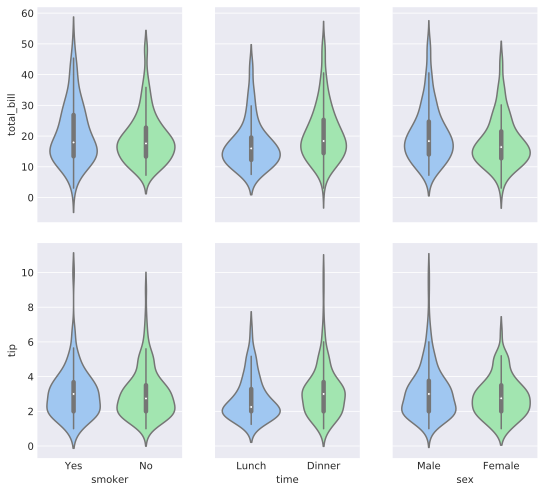

In [103]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")

In [104]:
sns.factorplot?

Signature: sns.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f08bc07d9d8>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
Docstring:
Draw a categorical plot onto a FacetGrid.

The default plot that is shown is a point plot, but other seaborn
categorical plots can be chosen with the ``kind`` parameter, including
box plots, violin plots, bar plots, or strip plots.

It is important to choose how variables get mapped to the plot structure
such that the most important comparisons are easiest to make. As a general
rule, it is easier to compare positions that are closer together, so the
``hue`` variable should be used for the most important comparisons. For
secondary comparisons, try to share the quantitative axis (so, use ``col``
for vertical plots and ``row`` for horizontal plots). Note that, although
it is possible to make rather complex plots using this function, in many
cases you may be better served by created several smaller and more focused
plots than by trying to stuff many comparisons into one figure.

After plotting, the :class:`FacetGrid` with the plot is returned and can
be used directly to tweak supporting plot details or add other layers.

Note that, unlike when using the underlying plotting functions directly,
data must be passed in a long-form DataFrame with variables specified by
passing strings to ``x``, ``y``, ``hue``, and other parameters.

As in the case with the underlying plot functions, if variables have a
``categorical`` data type, the correct orientation of the plot elements,
the levels of the categorical variables, and their order will be inferred
from the objects. Otherwise you may have to use the function parameters
(``orient``, ``order``, ``hue_order``, etc.) to set up the plot correctly.

Parameters
----------
x, y, hue : names of variables in ``data``
    Inputs for plotting long-form data. See examples for interpretation.        
data : DataFrame
    Long-form (tidy) dataset for plotting. Each column should correspond
    to a variable, and each row should correspond to an observation.    
row, col : names of variables in ``data``, optional
    Categorical variables that will determine the faceting of the grid.
col_wrap : int, optional
    "Wrap" the column variable at this width, so that the column facets
    span multiple rows. Incompatible with a ``row`` facet.    
estimator : callable that maps vector -> scalar, optional
    Statistical function to estimate within each categorical bin.
ci : float or "sd" or None, optional
    Size of confidence intervals to draw around estimated values.  If
    "sd", skip bootstrapping and draw the standard deviation of the
    observations. If ``None``, no bootstrapping will be performed, and
    error bars will not be drawn.
n_boot : int, optional
    Number of bootstrap iterations to use when computing confidence
    intervals.
units : name of variable in ``data`` or vector data, optional
    Identifier of sampling units, which will be used to perform a
    multilevel bootstrap and account for repeated measures design.    
order, hue_order : lists of strings, optional
    Order to plot the categorical levels in, otherwise the levels are
    inferred from the data objects.        
row_order, col_order : lists of strings, optional
    Order to organize the rows and/or columns of the grid in, otherwise the
    orders are inferred from the data objects.
kind : {``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``}
    The kind of plot to draw.
size : scalar, optional
    Height (in inches) of each facet. See also: ``aspect``.    
aspect : scalar, optional
    Aspect ratio of each facet, so that ``aspect * size`` gives the width
    of each facet in inches.    
orient : "v" | "h", optional
    Orientation of the plot (vertical or horizontal). This is usually
    inferred from the dtype of the input variables, but can be used to
    specify when the "categorical" variable is a numeric or when plotting
    wide-form data.    
color : matplotlib color, optional
    Color for all of the elements, or seed for a gradient palette.

palette : palette name, list, or dict, optional
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.    
legend : bool, optional
    If ``True`` and there is a ``hue`` variable, draw a legend on the plot.
legend_out : bool, optional
    If ``True``, the figure size will be extended, and the legend will be
    drawn outside the plot on the center right.    
share{x,y} : bool, optional
    If true, the facets will share y axes across columns and/or x axes
    across rows.    
margin_titles : bool, optional
    If ``True``, the titles for the row variable are drawn to the right of
    the last column. This option is experimental and may not work in all
    cases.    
facet_kws : dict, optional
    Dictionary of other keyword arguments to pass to :class:`FacetGrid`.
kwargs : key, value pairings
    Other keyword arguments are passed through to the underlying plotting
    function.
    
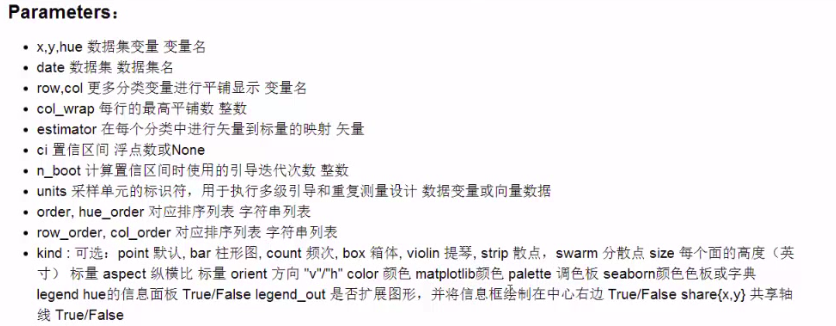

Returns
-------
g : :class:`FacetGrid`
    Returns the :class:`FacetGrid` object with the plot on it for further
    tweaking.

Examples
--------

Draw a single facet to use the :class:`FacetGrid` legend placement:

.. plot::
    :context: close-figs

    >>> import seaborn as sns
    >>> sns.set(style="ticks")
    >>> exercise = sns.load_dataset("exercise")
    >>> g = sns.factorplot(x="time", y="pulse", hue="kind", data=exercise)

Use a different plot kind to visualize the same data:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="time", y="pulse", hue="kind",
    ...                    data=exercise, kind="violin")

Facet along the columns to show a third categorical variable:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="time", y="pulse", hue="kind",
    ...                    col="diet", data=exercise)

Use a different size and aspect ratio for the facets:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="time", y="pulse", hue="kind",
    ...                    col="diet", data=exercise,
    ...                    size=5, aspect=.8)

Make many column facets and wrap them into the rows of the grid:

.. plot::
    :context: close-figs

    >>> titanic = sns.load_dataset("titanic")
    >>> g = sns.factorplot("alive", col="deck", col_wrap=4,
    ...                    data=titanic[titanic.deck.notnull()],
    ...                    kind="count", size=2.5, aspect=.8)

Plot horizontally and pass other keyword arguments to the plot function:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="age", y="embark_town",
    ...                    hue="sex", row="class",
    ...                    data=titanic[titanic.embark_town.notnull()],
    ...                    orient="h", size=2, aspect=3.5, palette="Set3",
    ...                    kind="violin", dodge=True, cut=0, bw=.2)

Use methods on the returned :class:`FacetGrid` to tweak the presentation:

.. plot::
    :context: close-figs

    >>> g = sns.factorplot(x="who", y="survived", col="class",
    ...                    data=titanic, saturation=.5,
    ...                    kind="bar", ci=None, aspect=.6)
    >>> (g.set_axis_labels("", "Survival Rate")
    ...   .set_xticklabels(["Men", "Women", "Children"])
    ...   .set_titles("{col_name} {col_var}")
    ...   .set(ylim=(0, 1))
    ...   .despine(left=True))  #doctest: +ELLIPSIS
    <seaborn.axisgrid.FacetGrid object at 0x...>
File:      ~/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py
Type:      function